In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
#%matplotlib ipympl
import glob as gb
import csv

from sklearn import manifold

In [69]:
res = 64

In [55]:
total = []

img_path = gb.glob("data/*.JPG") 
i = 0
for path in img_path:
    pl = path.lower()
        
    img1 = cv2.imread(path, cv2.IMREAD_GRAYSCALE)#'data/Resized_256_256xBroken_0.JPG', cv2.IMREAD_GRAYSCALE)
    if img1 is None:                   #判断读入的img1是否为空，为空就继续下一轮循环
                continue
    res1= cv2.resize(img1,(res,res))              #对图片进行缩放，第一个参数是读入的图片，第二个是制定的缩放大小
    res1 = cv2.equalizeHist(res1)
    res1_1 = res1.flatten()/255.0 #res1_1 = res1.reshape(1,784)/255.0       #将表示图片的二维矩阵转换成一维
    #im_data = np.concatenate((im_data, res1_1))
    res1_1_1 = res1_1.tolist()                     #将numpy.narray类型的矩阵转换成list
    total.append(res1_1_1)  


# Label 10 classes

In [56]:
label10 = []
#im_data = np.array([])
img_path = gb.glob("data/*.JPG") 
i = 0
for path in img_path:
    pl = path.lower()
    if "dripping" in pl:
        if "dripping_30oct" in pl:
            label = 0
        else:
            label = 1
    elif "jetting" in pl:
        if "extreme" in pl:
            label = 2
        elif "30oct" in pl:
            label = 3
        else:
            label = 4
    elif "wetting" in pl:
        if "extreme" in pl:
            label = 5
        elif "30oct" in pl:
            label = 6
        else:
            label = 7
    elif "broken" in pl: 
        if "new" in pl:
            label = 8
        else:
            label = 9
    else:
        label = 10
        
    label10.append(label)

# Label 4 classes

In [60]:
label4 = []
img_path = gb.glob("data/*.JPG") 
for path in img_path:
    pl = path.lower()
    if "dripping" in pl:
        label = 0
    elif "jetting" in pl:
        label = 1
    elif "wetting" in pl:
        label = 2
    else: 
        label = 3
        
    label4.append(label)

# Save Image Data

In [62]:
im_data = np.array(total)
im_data.tofile('data/img'+str(res)+'.bin')
im_lb4 = np.array(label4)
im_lb4.tofile('data/label4.bin')
im_lb10 = np.array(label10)
im_lb10.tofile('data/label10.bin')

# Load Image Data

In [63]:
# Load IMG
res2 = res*res
data = np.fromfile('data/img'+str(res)+'.bin',  dtype=np.float64)
im_data = data.reshape(-1, res2)
# Load Label
im_lb4 = np.fromfile('data/label4.bin', dtype=np.int64)
im_lb10 = np.fromfile('data/label10.bin', dtype=np.int64)

# 2 component PCA 4 Classes

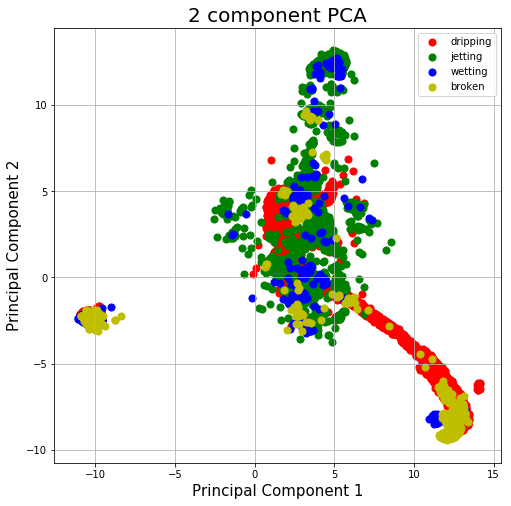

In [64]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(im_data)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0,1,2,3]
states = ['dripping', 'jetting', 'wetting', 'broken']
colors = ['r', 'g', 'b', 'y']
for target, color, state in zip(targets,colors,states):
    ##indicesToKeep = finalDf['target'] == target
    ind = im_lb4 == target
    ax.scatter(principalComponents[ind,0],#finalDf.loc[indicesToKeep, 'principal component 1']
               principalComponents[ind,1],#, finalDf.loc[indicesToKeep, 'principal component 2']
               c = color,
               s = 50)
ax.legend(states)
ax.grid()

# 2 component PCA 10 Classes

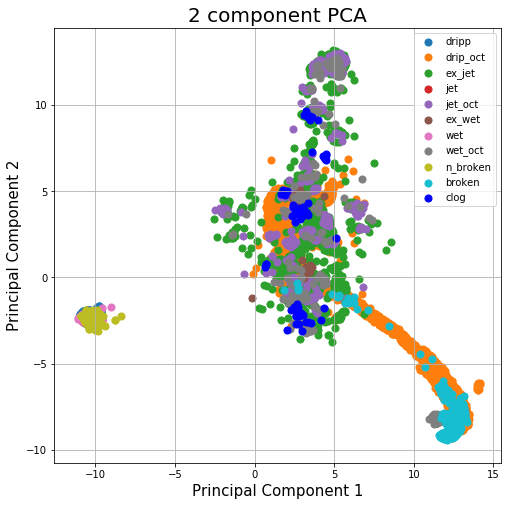

In [65]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(im_data)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0,1,2,3,4,5,6,7,8,9,10]
states = ['dripp', 'drip_oct', 'ex_jet', 'jet', 'jet_oct', 'ex_wet', 'wet', 'wet_oct', 'n_broken', 'broken', 'clog']
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'b']

for target, color, state in zip(targets,colors,states):
    ##indicesToKeep = finalDf['target'] == target
    ind = im_lb10 == target
    ax.scatter(principalComponents[ind,0],#finalDf.loc[indicesToKeep, 'principal component 1']
               principalComponents[ind,1],#, finalDf.loc[indicesToKeep, 'principal component 2']
               c = color,
               s = 50)
ax.legend(states)
ax.grid()

# 3 component PCA 4 Classes

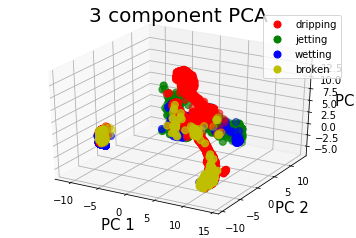

In [66]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(im_data)

#%matplotlib ipympl  # Interactive Mode, Delay due to data size
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('PC 1', fontsize = 15)
ax.set_ylabel('PC 2', fontsize = 15)
ax.set_zlabel('PC 3', fontsize = 15)
ax.set_title('3 component PCA', fontsize = 20)
targets = [0,1,2,3]
states = ['dripping', 'jetting', 'wetting', 'broken']
colors = ['r', 'g', 'b', 'y']
for target, color, state in zip(targets,colors,states):
    ##indicesToKeep = finalDf['target'] == target
    ind = im_lb4 == target
    ax.scatter(principalComponents[ind,0],#finalDf.loc[indicesToKeep, 'principal component 1']
               principalComponents[ind,1],#, finalDf.loc[indicesToKeep, 'principal component 2']
               principalComponents[ind,2],
               c = color,
               s = 50)
ax.legend(states)
ax.grid()

# 3 component PCA 10 Classes

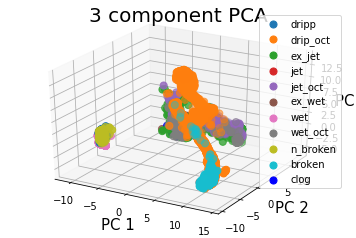

In [67]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(im_data)

#%matplotlib ipympl  # Interactive Mode, Delay due to data size
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('PC 1', fontsize = 15)
ax.set_ylabel('PC 2', fontsize = 15)
ax.set_zlabel('PC 3', fontsize = 15)
ax.set_title('3 component PCA', fontsize = 20)

targets = [0,1,2,3,4,5,6,7,8,9,10]
states = ['dripp', 'drip_oct', 'ex_jet', 'jet', 'jet_oct', 'ex_wet', 'wet', 'wet_oct', 'n_broken', 'broken', 'clog']
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'b']

for target, color, state in zip(targets,colors,states):
    ##indicesToKeep = finalDf['target'] == target
    ind = im_lb10 == target
    ax.scatter(principalComponents[ind,0],#finalDf.loc[indicesToKeep, 'principal component 1']
               principalComponents[ind,1],#, finalDf.loc[indicesToKeep, 'principal component 2']
               principalComponents[ind,2],
               c = color,
               s = 50)
ax.legend(states)
ax.grid()

# K Means on Flattened Daata

n_digits: 4, 	 n_samples 40346, 	 n_features 784
__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	18.10s	847213	0.391	0.274	0.322	0.185	0.274	0.428
random   	21.74s	847213	0.391	0.274	0.322	0.185	0.274	0.438
PCA-based	1.81s	847213	0.391	0.274	0.322	0.185	0.274	0.437
__________________________________________________________________________________


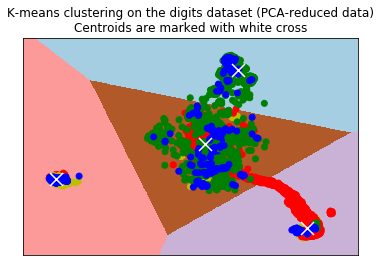

In [14]:

from sklearn.decomposition import PCA
from time import time

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale


n_samples, n_features = im_data.shape
n_digits = len(np.unique(im_lb))
labels = im_lb

sample_size = 300

colors = ['r', 'g', 'b', 'y']
cb = [colors[i] for i in labels]

print("n_digits: %d, \t n_samples %d, \t n_features %d"
      % (n_digits, n_samples, n_features))


print(82 * '_')
print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')


def bench_k_means(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    print('%-9s\t%.2fs\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name, (time() - t0), estimator.inertia_,
             metrics.homogeneity_score(labels, estimator.labels_),
             metrics.completeness_score(labels, estimator.labels_),
             metrics.v_measure_score(labels, estimator.labels_),
             metrics.adjusted_rand_score(labels, estimator.labels_),
             metrics.adjusted_mutual_info_score(labels,  estimator.labels_),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size)))

bench_k_means(KMeans(init='k-means++', n_clusters=n_digits, n_init=10),
              name="k-means++", data=im_data)

bench_k_means(KMeans(init='random', n_clusters=n_digits, n_init=10),
               name="random", data=im_data)

# in this case the seeding of the centers is deterministic, hence we run the
# kmeans algorithm only once with n_init=1
pca = PCA(n_components=n_digits).fit(im_data)
bench_k_means(KMeans(init=pca.components_, n_clusters=n_digits, n_init=1),
              name="PCA-based",
              data=im_data)
print(82 * '_')

# #############################################################################
# Visualize the results on PCA-reduced data

reduced_data = PCA(n_components=2).fit_transform(im_data)
kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

#plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], color = cb)

# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

# PCA in Fourier Domain

FigureCanvasNbAgg()

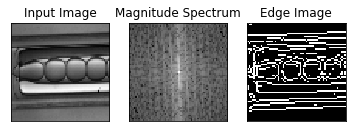

In [91]:
img = cv2.imread('data/Resized_256_256xBroken_10.JPG',cv2.IMREAD_GRAYSCALE)
img= cv2.resize(img,(64,64))

f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

edges = cv2.Canny(img,64,64)

plt.subplot(131),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

# Process and Save IMGs in Fourier Domain

In [69]:
totalf = []

img_path = gb.glob("data/*.JPG") 
i = 0
for path in img_path:
    pl = path.lower()
    
    img1 = cv2.imread(path, cv2.IMREAD_GRAYSCALE)#'data/Resized_256_256xBroken_0.JPG', cv2.IMREAD_GRAYSCALE)
    if img1 is None:                   #判断读入的img1是否为空，为空就继续下一轮循环
                continue
    res1= cv2.resize(img1,(res,res))              #对图片进行缩放，第一个参数是读入的图片，第二个是制定的缩放大小
    res1 = cv2.equalizeHist(res1)
    #res1_1 = res1.flatten()/255.0 #res1_1 = res1.reshape(1,784)/255.0       #将表示图片的二维矩阵转换成一维
    #im_data = np.concatenate((im_data, res1_1))
    f = np.fft.fft2(res1)
    fshift = np.fft.fftshift(f)
    res1_1 = 20*np.ma.log(np.abs(fshift))
    res1_1_1 = res1_1.flatten().tolist()                     #将numpy.narray类型的矩阵转换成list
    totalf.append(res1_1_1)  


# Save Fourier Image

In [70]:
im_data = np.array(totalf)
im_dataf = im_data.astype(float)
im_dataf.tofile('data/imgf'+str(res)+'.bin')

# Load Fourier Image

In [70]:
# Load IMG
res2 = res*res
data = np.fromfile('data/imgf'+str(res)+'.bin',  dtype=np.float64)
im_dataf = data.reshape(-1, res2)

# Load Label
im_lb4 = np.fromfile('data/label4.bin', dtype=np.int64)
im_lb10 = np.fromfile('data/label10.bin', dtype=np.int64)

# Replacing NAN WITH AVG
im_dataf[np.isnan(im_dataf)] = np.nanmean(im_dataf)
#im_dataf[np.is(im_dataf)] = np.nanmean(im_dataf)


# PCA 2 components on Fourier Domain 4 Classes

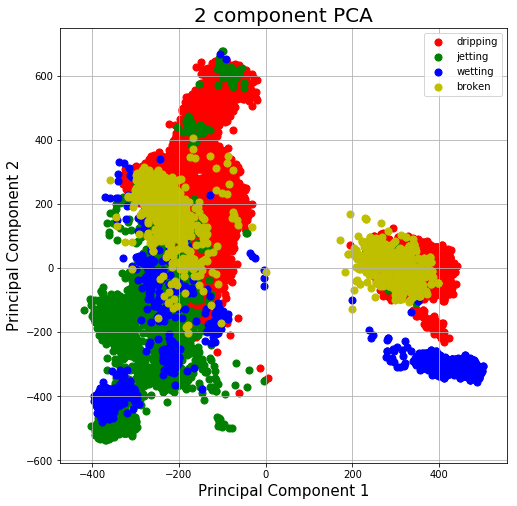

In [75]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(im_dataf)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA Fourier', fontsize = 20)
targets = [0,1,2,3]
states = ['dripping', 'jetting', 'wetting', 'broken']
colors = ['r', 'g', 'b', 'y']
for target, color, state in zip(targets,colors,states):
    ##indicesToKeep = finalDf['target'] == target
    ind = im_lb4 == target
    ax.scatter(principalComponents[ind,0],#finalDf.loc[indicesToKeep, 'principal component 1']
               principalComponents[ind,1],#, finalDf.loc[indicesToKeep, 'principal component 2']
               c = color,
               s = 50)
ax.legend(states)
ax.grid()

# PCA 3 components on Fourier Domain 4 Classes

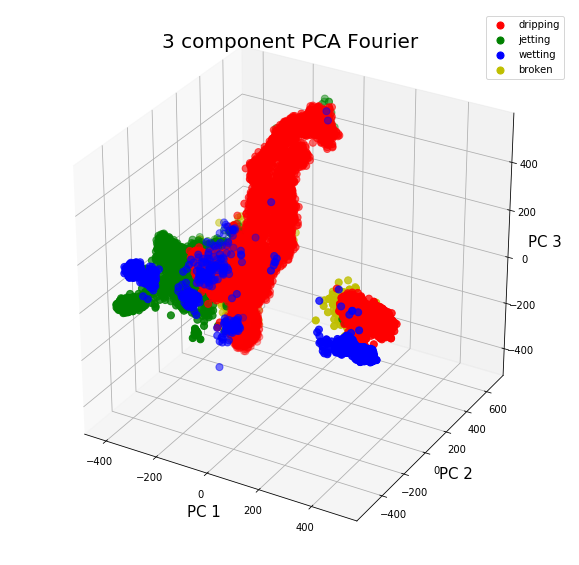

In [77]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(im_dataf)


#%matplotlib ipympl
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('PC 1', fontsize = 15)
ax.set_ylabel('PC 2', fontsize = 15)
ax.set_zlabel('PC 3', fontsize = 15)
ax.set_title('3 component PCA Fourier', fontsize = 20)
targets = [0,1,2,3]
states = ['dripping', 'jetting', 'wetting', 'broken']
colors = ['r', 'g', 'b', 'y']
for target, color, state in zip(targets,colors,states):
    ##indicesToKeep = finalDf['target'] == target
    ind = im_lb4 == target
    ax.scatter(principalComponents[ind,0],#finalDf.loc[indicesToKeep, 'principal component 1']
               principalComponents[ind,1],#, finalDf.loc[indicesToKeep, 'principal component 2']
               principalComponents[ind,2],
               c = color,
               s = 50)
ax.legend(states)
ax.grid()

# PCA 2 components on Fourier Domain 10 Classes

In [1]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(im_dataf)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA Fourier', fontsize = 20)

targets = [0,1,2,3,4,5,6,7,8,9,10]
states = ['dripp', 'drip_oct', 'ex_jet', 'jet', 'jet_oct', 'ex_wet', 'wet', 'wet_oct', 'n_broken', 'broken', 'clog']
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'b']

for target, color, state in zip(targets,colors,states):
    ##indicesToKeep = finalDf['target'] == target
    ind = im_lb10 == target
    ax.scatter(principalComponents[ind,0],#finalDf.loc[indicesToKeep, 'principal component 1']
               principalComponents[ind,1],#, finalDf.loc[indicesToKeep, 'principal component 2']
               c = color,
               s = 50)
ax.legend(states)
ax.grid()

NameError: name 'manifold' is not defined

# Spectral Embedding

In [5]:


from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_red = manifold.SpectralEmbedding(n_components=2).fit_transform(im_dataf)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA Fourier', fontsize = 20)

targets = [0,1,2,3,4,5,6,7,8,9,10]
states = ['dripp', 'drip_oct', 'ex_jet', 'jet', 'jet_oct', 'ex_wet', 'wet', 'wet_oct', 'n_broken', 'broken', 'clog']
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'b']

for target, color, state in zip(targets,colors,states):
    ##indicesToKeep = finalDf['target'] == target
    ind = im_lb10 == target
    ax.scatter(X_red[ind,0],#finalDf.loc[indicesToKeep, 'principal component 1']
               X_red[ind,1],#, finalDf.loc[indicesToKeep, 'principal component 2']
               c = color,
               s = 50)
ax.legend(states)
ax.grid()

SystemError: gstrf was called with invalid arguments

# PCA 3 components on Fourier Domain 10 Classes Size 64

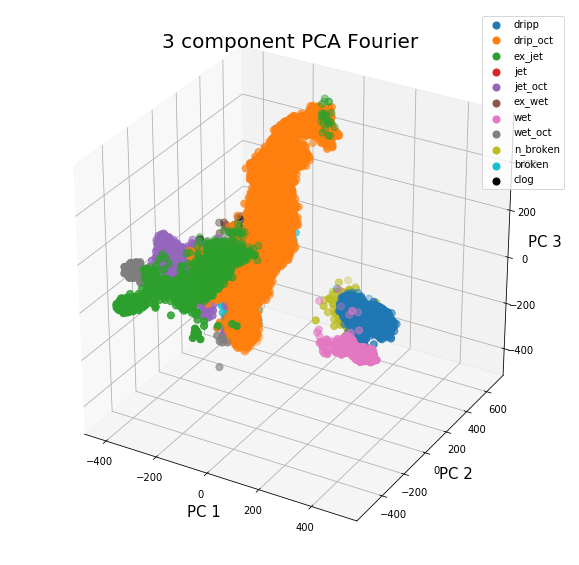

In [79]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(im_dataf)


#%matplotlib ipympl
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('PC 1', fontsize = 15)
ax.set_ylabel('PC 2', fontsize = 15)
ax.set_zlabel('PC 3', fontsize = 15)
ax.set_title('3 component PCA Fourier', fontsize = 20)

targets = [0,1,2,3,4,5,6,7,8,9,10]
states = ['dripp', 'drip_oct', 'ex_jet', 'jet', 'jet_oct', 'ex_wet', 'wet', 'wet_oct', 'n_broken', 'broken', 'clog']
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'k']

for target, color, state in zip(targets,colors,states):
    ##indicesToKeep = finalDf['target'] == target
    ind = im_lb10 == target
    ax.scatter(principalComponents[ind,0],#finalDf.loc[indicesToKeep, 'principal component 1']
               principalComponents[ind,1],#, finalDf.loc[indicesToKeep, 'principal component 2']
               principalComponents[ind,2],
               c = color,
               s = 50)
ax.legend(states)
ax.grid()

# PCA 3 components on Fourier Domain 10 Classes Size 28

In [4]:
# 28
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(im_dataf)


%matplotlib ipympl
#%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('PC 1', fontsize = 15)
ax.set_ylabel('PC 2', fontsize = 15)
ax.set_zlabel('PC 3', fontsize = 15)
ax.set_title('3 component PCA Fourier', fontsize = 20)

targets = [0,1,2,3,4,5,6,7,8,9,10]
states = ['dripp', 'drip_oct', 'ex_jet', 'jet', 'jet_oct', 'ex_wet', 'wet', 'wet_oct', 'n_broken', 'broken', 'clog']
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'k']

for target, color, state in zip(targets,colors,states):
    ##indicesToKeep = finalDf['target'] == target
    ind = im_lb10 == target
    ax.scatter(principalComponents[ind,0],#finalDf.loc[indicesToKeep, 'principal component 1']
               principalComponents[ind,1],#, finalDf.loc[indicesToKeep, 'principal component 2']
               principalComponents[ind,2],
               c = color,
               s = 50)
ax.legend(states)
ax.grid()

FigureCanvasNbAgg()

# PCA 3 components 3 Views 4 Classes Fourier Size 64

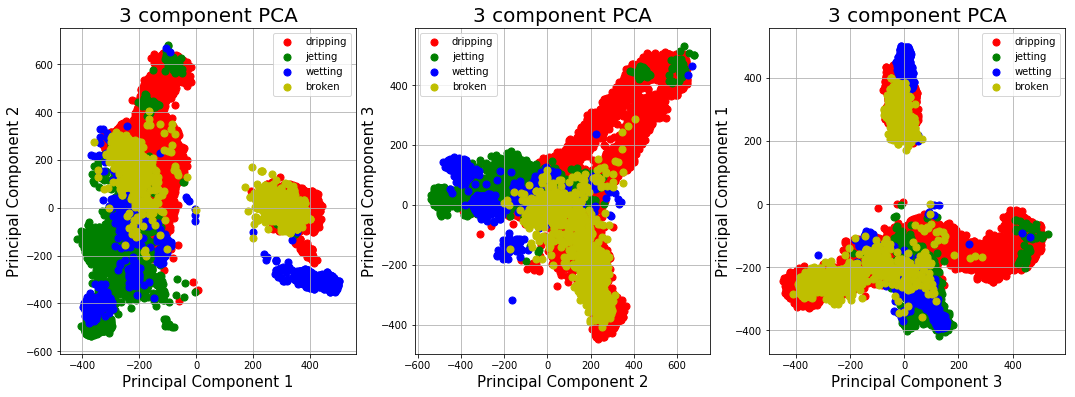

In [80]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(im_dataf)

fig = plt.figure(figsize = (18,6))
for i in range(3):
    ax = fig.add_subplot(1,3,i+1) 

    ax.set_xlabel('Principal Component ' + str(i%3+1), fontsize = 15)
    ax.set_ylabel('Principal Component ' +str((i+1)%3+1), fontsize = 15)
    
    ax.set_title('3 component PCA', fontsize = 20)
    targets = [0,1,2,3]
    states = ['dripping', 'jetting', 'wetting', 'broken']
    colors = ['r', 'g', 'b', 'y']
    for target, color, state in zip(targets,colors,states):

        ind = im_lb4 == target
        ax.scatter(principalComponents[ind,i%3],#finalDf.loc[indicesToKeep, 'principal component 1']
                   principalComponents[ind,(i+1)%3],#, finalDf.loc[indicesToKeep, 'principal component 2']
                   c = color,
                   s = 50)
    ax.legend(states)
    ax.grid()

# PCA 3 components 3 Views 10 Classes Fourier Size 64

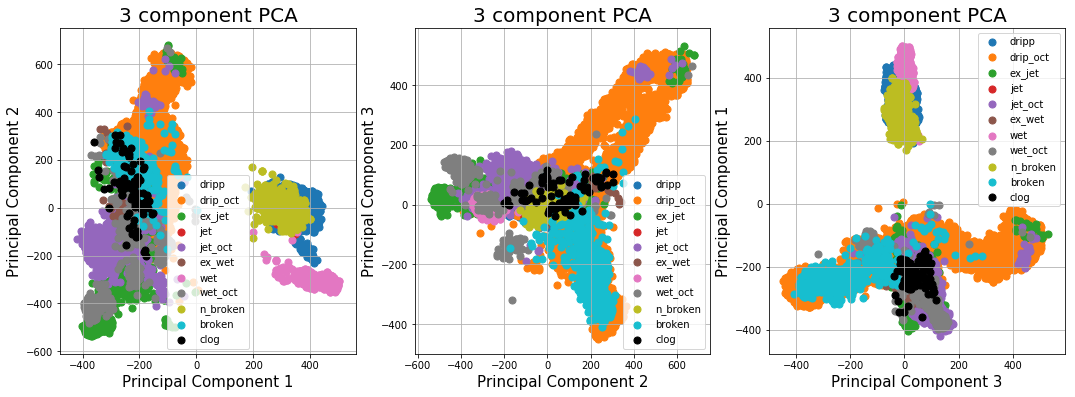

In [81]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(im_dataf)

fig = plt.figure(figsize = (18,6))
for i in range(3):
    ax = fig.add_subplot(1,3,i+1) 

    ax.set_xlabel('Principal Component ' + str(i%3+1), fontsize = 15)
    ax.set_ylabel('Principal Component ' +str((i+1)%3+1), fontsize = 15)
    
    ax.set_title('3 component PCA', fontsize = 20)

    targets = [0,1,2,3,4,5,6,7,8,9,10]
    states = ['dripp', 'drip_oct', 'ex_jet', 'jet', 'jet_oct', 'ex_wet', 'wet', 'wet_oct', 'n_broken', 'broken', 'clog']
    colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'k']
    
    for target, color, state in zip(targets,colors,states):

        ind = im_lb10 == target
        ax.scatter(principalComponents[ind,i%3],#finalDf.loc[indicesToKeep, 'principal component 1']
                   principalComponents[ind,(i+1)%3],#, finalDf.loc[indicesToKeep, 'principal component 2']
                   c = color,
                   s = 50)
    ax.legend(states)
    ax.grid()

# PCA 3 components on Fourier Domain 10 Classes Size 28

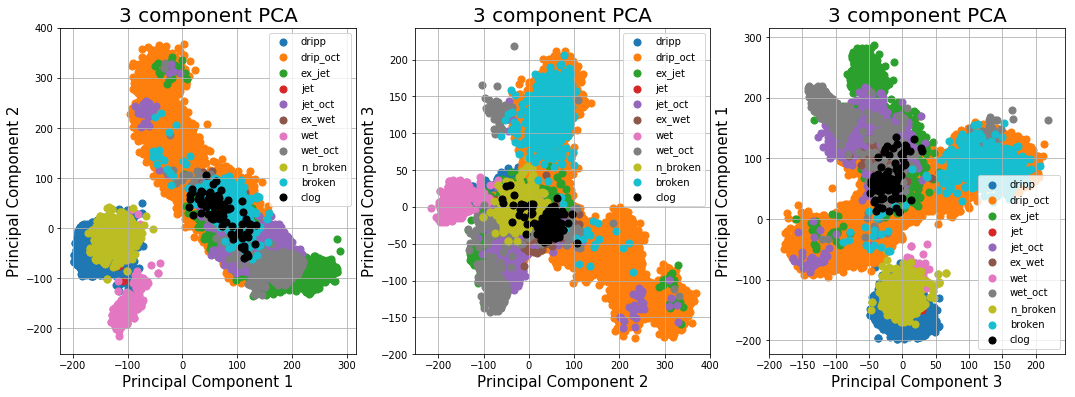

In [85]:
# 28 times 28 

from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(im_dataf)

fig = plt.figure(figsize = (18,6))
for i in range(3):
    ax = fig.add_subplot(1,3,i+1) 

    ax.set_xlabel('Principal Component ' + str(i%3+1), fontsize = 15)
    ax.set_ylabel('Principal Component ' +str((i+1)%3+1), fontsize = 15)
    
    ax.set_title('3 component PCA', fontsize = 20)

    targets = [0,1,2,3,4,5,6,7,8,9,10]
    states = ['dripp', 'drip_oct', 'ex_jet', 'jet', 'jet_oct', 'ex_wet', 'wet', 'wet_oct', 'n_broken', 'broken', 'clog']
    colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'k']
    
    for target, color, state in zip(targets,colors,states):

        ind = im_lb10 == target
        ax.scatter(principalComponents[ind,i%3],#finalDf.loc[indicesToKeep, 'principal component 1']
                   principalComponents[ind,(i+1)%3],#, finalDf.loc[indicesToKeep, 'principal component 2']
                   c = color,
                   s = 50)
    ax.legend(states)
    ax.grid()

# To test, different preprocessing/ rotation blur/ normalization

# Hierarchical Clustering Test

In [ ]:

def plot_clustering(X_red, X, labels, title=None):
    x_min, x_max = np.min(X_red, axis=0), np.max(X_red, axis=0)
    X_red = (X_red - x_min) / (x_max - x_min)

    plt.figure(figsize=(6, 4))
    for i in range(X_red.shape[0]):
        plt.text(X_red[i, 0], X_red[i, 1], str(y[i]),
                 color=plt.cm.nipy_spectral(labels[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    plt.xticks([])
    plt.yticks([])
    if title is not None:
        plt.title(title, size=17)
    plt.axis('off')
    plt.tight_layout()
    
X_red = manifold.SpectralEmbedding(n_components=2).fit_transform(im_dataf)
print("Done.")

from sklearn.cluster import AgglomerativeClustering

for linkage in ('ward', 'average', 'complete'):
    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=11)
    t0 = time()
    clustering.fit(X_red)
    print("%s : %.2fs" % (linkage, time() - t0))

    plot_clustering(X_red, X, im_lb10, "%s linkage" % linkage)


plt.show()

In [ ]:
print(__doc__)


# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import datasets

np.random.seed(5)

iris = datasets.load_iris()
X = im_dataf
y = im_lb10

estimators = [('k_means_11', KMeans(n_clusters=11)),
              ('k_means_4', KMeans(n_clusters=4)),
              ('k_means_bad_init', KMeans(n_clusters=4, n_init=1,
                                               init='random'))]

fignum = 1
titles = ['11 clusters', '4 clusters', '4 clusters, bad initialization']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title('Ground Truth')
ax.dist = 12

fig.show()

Automatically created module for IPython interactive environment


# Cluster Mean Calculation

In [71]:
from sklearn.decomposition import PCA
cols = len(im_dataf[0,:])
print(cols)
#pca = PCA(n_components=3)
#pcs = pca.fit_transform(im_dataf)
my_mean = np.empty([11, cols])

for i in range(11):
    cur_class = im_dataf[[im_lb10==i]]
    #print(cur_class.shape)
    cur_avg = np.mean(cur_class,axis = 0)
    my_mean[i,:] = cur_avg
print(my_mean)

4096
[[109.62885223 116.85403056 116.10248274 ... 124.05526906 117.23384501
  117.86354131]
 [115.9543447  124.30690242 125.4195227  ... 125.64601593 125.92694941
  124.70887139]
 [108.87450269 113.07717432 122.41984161 ... 119.47187882 118.330409
  115.79997654]
 ...
 [107.85882048 115.29825314 114.75634052 ... 123.80985418 115.41845172
  116.13708547]
 [112.39244287 125.38400593 124.77327317 ... 125.222477   125.55864093
  121.65926053]
 [113.15650893 125.06747103 125.56935433 ... 127.22076006 124.68809149
  125.48636075]]


# Classify based on Euclidean Distance 

In [72]:
def find_nearest(array, value):
    #idx = np.linalg.norm(array-value).argmin()
    #idx = (np.abs(array - value)).argmin()
    #print(np.linalg.norm(array-value))
    diff = np.abs(array - value)
    idx = np.sum(diff**2, axis=1).argmin()
    return idx

def find_nearest2(array, value):
    #idx = np.linalg.norm(array-value).argmin()
    #idx = (np.abs(array - value)).argmin()
    #print(np.linalg.norm(array-value))
    diff = np.abs(array - value)
    idx = np.sum(diff, axis=1).argmin()
    return idx

In [73]:
cl_lb10a = np.copy(im_lb10)
for i in range(len(im_lb10)):
    cl_lb10a[i] = find_nearest2(my_mean,im_dataf[i,:])

cl_lb10 = np.copy(im_lb10)
for i in range(len(im_lb10)):
    cl_lb10[i] = find_nearest(my_mean,im_dataf[i,:])

In [74]:
cl_lb4 = np.copy(cl_lb10)
for i in range(len(cl_lb10)):
    lb = cl_lb10[i]
    if lb <2:
        cl_lb4[i] = 0
    elif lb<5:
        cl_lb4[i] = 1
    elif lb<8:
        cl_lb4[i] = 2
    else:
        cl_lb4[i] = 3

In [75]:
cl_lb4a = np.copy(cl_lb10a)
for i in range(len(cl_lb10a)):
    lb = cl_lb10a[i]
    if lb <2:
        cl_lb4a[i] = 0
    elif lb<5:
        cl_lb4a[i] = 1
    elif lb<8:
        cl_lb4a[i] = 2
    else:
        cl_lb4a[i] = 3

In [79]:
#cl_lb4[cl_lb4==0].shape
#im_lb4[im_lb4==3].shape
cl_lb4[cl_lb4==3].shape

(7971,)

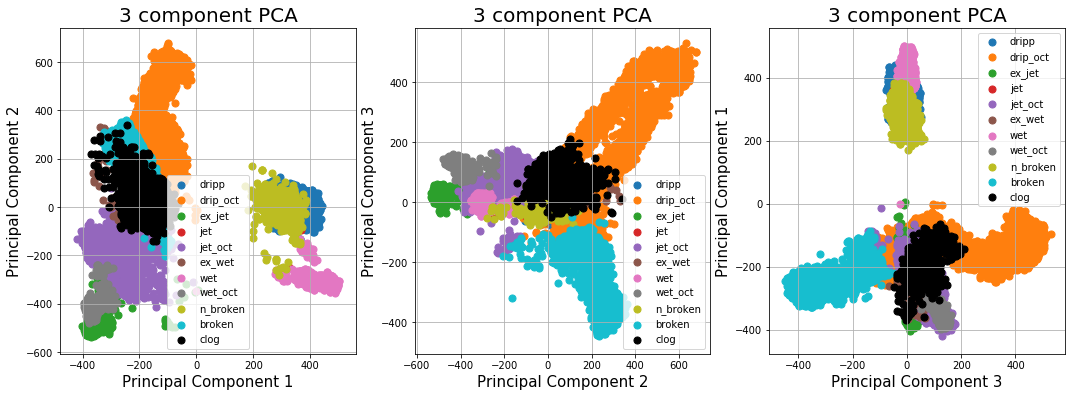

In [80]:
# 28 times 28 

from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(im_dataf)

fig = plt.figure(figsize = (18,6))
for i in range(3):
    ax = fig.add_subplot(1,3,i+1) 

    ax.set_xlabel('Principal Component ' + str(i%3+1), fontsize = 15)
    ax.set_ylabel('Principal Component ' +str((i+1)%3+1), fontsize = 15)
    
    ax.set_title('3 component PCA', fontsize = 20)

    targets = [0,1,2,3,4,5,6,7,8,9,10]
    states = ['dripp', 'drip_oct', 'ex_jet', 'jet', 'jet_oct', 'ex_wet', 'wet', 'wet_oct', 'n_broken', 'broken', 'clog']
    colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'k']
    
    for target, color, state in zip(targets,colors,states):

        ind = cl_lb10 == target
        ax.scatter(principalComponents[ind,i%3],#finalDf.loc[indicesToKeep, 'principal component 1']
                   principalComponents[ind,(i+1)%3],#, finalDf.loc[indicesToKeep, 'principal component 2']
                   c = color,
                   s = 50)
    ax.legend(states)
    ax.grid()

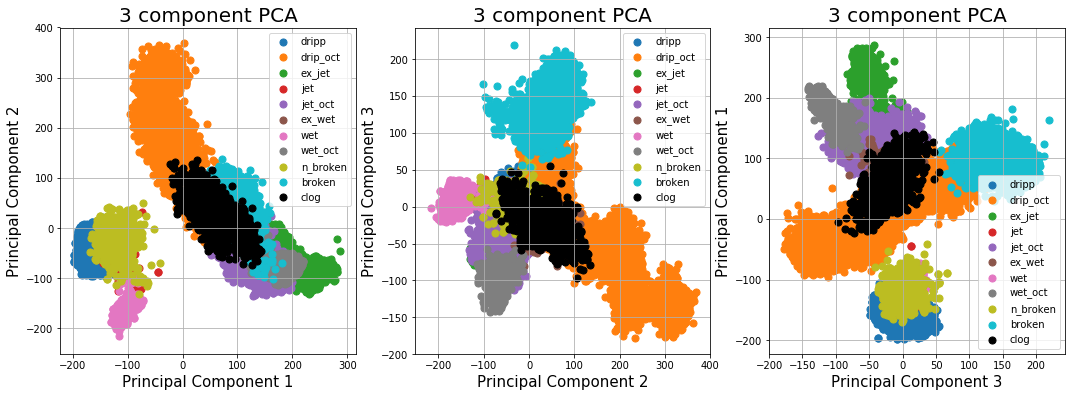

In [56]:
# 28 times 28 

from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(im_dataf)

fig = plt.figure(figsize = (18,6))
for i in range(3):
    ax = fig.add_subplot(1,3,i+1) 

    ax.set_xlabel('Principal Component ' + str(i%3+1), fontsize = 15)
    ax.set_ylabel('Principal Component ' +str((i+1)%3+1), fontsize = 15)
    
    ax.set_title('3 component PCA', fontsize = 20)

    targets = [0,1,2,3,4,5,6,7,8,9,10]
    states = ['dripp', 'drip_oct', 'ex_jet', 'jet', 'jet_oct', 'ex_wet', 'wet', 'wet_oct', 'n_broken', 'broken', 'clog']
    colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'k']
    
    for target, color, state in zip(targets,colors,states):

        ind = cl_lb10a == target
        ax.scatter(principalComponents[ind,i%3],#finalDf.loc[indicesToKeep, 'principal component 1']
                   principalComponents[ind,(i+1)%3],#, finalDf.loc[indicesToKeep, 'principal component 2']
                   c = color,
                   s = 50)
    ax.legend(states)
    ax.grid()

In [10]:
def find_nearest(array, value):
    idx = (np.abs(array - value)).argmin()
    return array[idx]

array([False, False,  True, ..., False, False,  True])

# To test, TDA 